In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from sklearn.manifold import TSNE


transform = torchvision.transforms.Compose([
                    torchvision.transforms.ToTensor(),
                    torchvision.transforms.Normalize(0.5, 0.5)])

train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)


def encode_label(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


def shape_data(data):
    features = [np.reshape(x[0][0].numpy(), (784, 1)) for x in data]
    labels = [encode_label(y[1]) for y in data]
    return zip(features, labels)


def average_digit(data, digit):
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)


def classifier(digit, num):
    b = [68, 49, 50, 57, 52, 49, 60, 55, 53, 68]
    w = np.transpose(avg_digits[num])
    res = np.dot(w, digit) - b[num]
    return res >= 0


def check_accuracy():
    true = np.zeros(10)
    t = np.zeros[10]
    for digit in train:
        for i in range(10):
            t[i] = classifier(digit[0], i)
            
            if t[i] == 1 and (np.where(digit[1] == 1)[0][0] == 0) or (t[i] == 0 and (np.where(digit[1] == 1))[0][0] != 0):
                true[i] += 1
    
    for i in range(10):    
        print(f'Classifier_{i} accuracy: ', round(true[i] / 600), 2)

def model(digit):
    res = []
    for i in range(10):
        if classifier(digit, i):
            res += [1] + (9 - i) * [0]
            return res
        else:
            res.append(0)
    return res

def checkModel():
    tp, fp, fn = 0, 0, 0
    for dig in test_dataset:
        pred = model(dig[0])
        if np.where(dig[1] == 1) == pred.index(1):
            tp += 1

100.0%


Extracting ./MNIST/test\MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST/test\MNIST\raw



100.0%


Extracting ./MNIST/test\MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST/test\MNIST\raw



100.0%


Extracting ./MNIST/test\MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST/test\MNIST\raw



100.0%

Extracting ./MNIST/test\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST/test\MNIST\raw


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


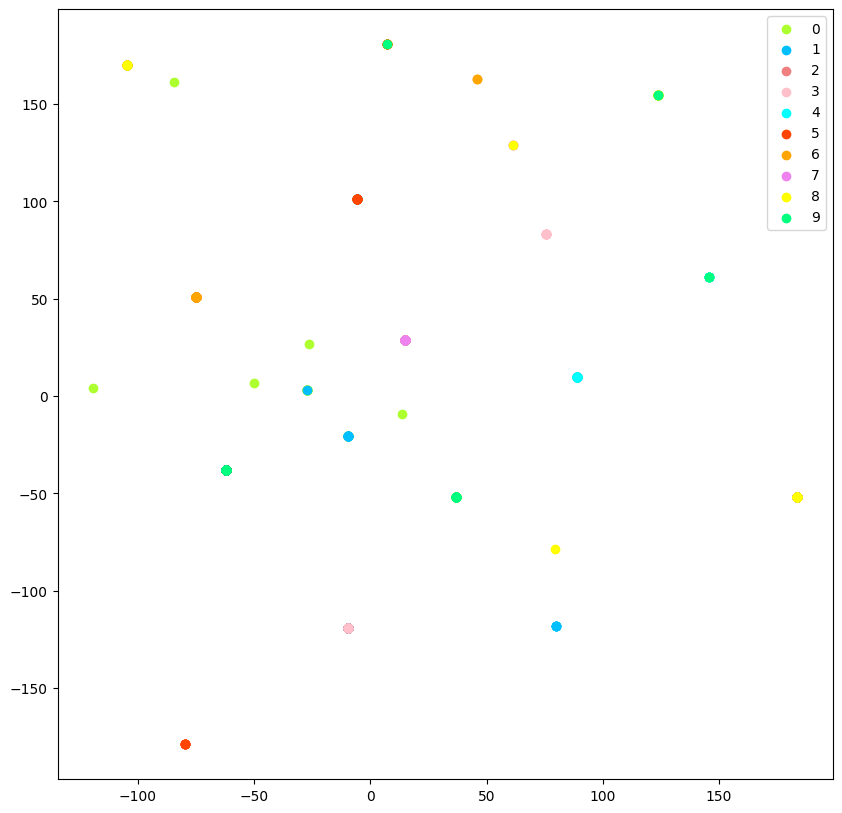

In [18]:
train = shape_data(train_dataset)
train = list(train)
test = shape_data(test_dataset)
test = list(test)

avg_digits = []
for i in range(10):
    t = average_digit(train, i)
    avg_digits.append(t)
    
k = 100
temp = 10 * [k]
arr = [[] for i in range(10)]
i = 0
while True:
    id = np.where(test[i][1] == 1)[0][0]
    if temp[id] > 0:
        arr[id].append(model(test[i][0]))
        temp[id] -= 1
    if sum(temp) == 0:
        arr = arr[0] + arr[1] + arr[2] + arr[3] + arr[4] + arr[5] + arr[6] + arr[7] + arr[8] + arr[9]
        arr = np.array(arr)
        print(arr)
        break
    i += 1

colors = ["#ADFF2F", "#00BFFF", "#F08080", "#FFC0CB", "#00FFFF", "#FF4500", "#FFA500", "#EE82EE", "#FFFF00", "#00FF7F"]
model = TSNE(n_components=2)
squeezed = model.fit_transform(arr)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.scatter([x[0] for x in squeezed[k*i:k*(i+1)]],
                [x[1] for x in squeezed[k*i:k*(i+1)]],
                color=colors[i], label=str(i))
plt.legend()
plt.show()